# Hit Target Game - Machine Learning Project

This project demonstrates the use of machine learning to solve a physics-based problem: determining the correct parameters (initial height, velocity, and angle) for a projectile to hit a target. The project involves generating synthetic data, training a neural network model, and using the model to predict optimal solutions.

## Key Steps in the Project:
1. **Data Generation**:
    - Synthetic data is generated using the `HitTargetGame` class, which simulates projectile motion with varying parameters such as target distance, height, diameter, initial height, velocity, and angle.

2. **Data Preparation**:
    - The generated data is divided into features (`X`) and target variable (`y`), and further split into training and testing datasets.

3. **Model Creation and Training**:
    - A neural network model is created using TensorFlow/Keras. The model is trained to predict whether the projectile will hit the target based on the input parameters.

4. **Model Evaluation**:
    - The model's performance is evaluated using test data, and metrics such as loss and accuracy are calculated.

5. **Prediction and Visualization**:
    - The trained model is used to predict the best parameters for hitting a target with given specifications (distance, height, and diameter).
    - The results are visualized using a graphical representation of the projectile motion and the target.

## Libraries and Tools Used:
- `pandas` for data manipulation and analysis.
- `matplotlib` for data visualization.
- `scikit-learn` for data splitting.
- `tensorflow` for building and training the neural network.
- Custom modules (`HitTargetGame`, `ProjectileMotion`, `Graph`) for physics simulation and visualization.

This project combines physics, machine learning, and data visualization to solve a practical problem in an interactive and educational way.

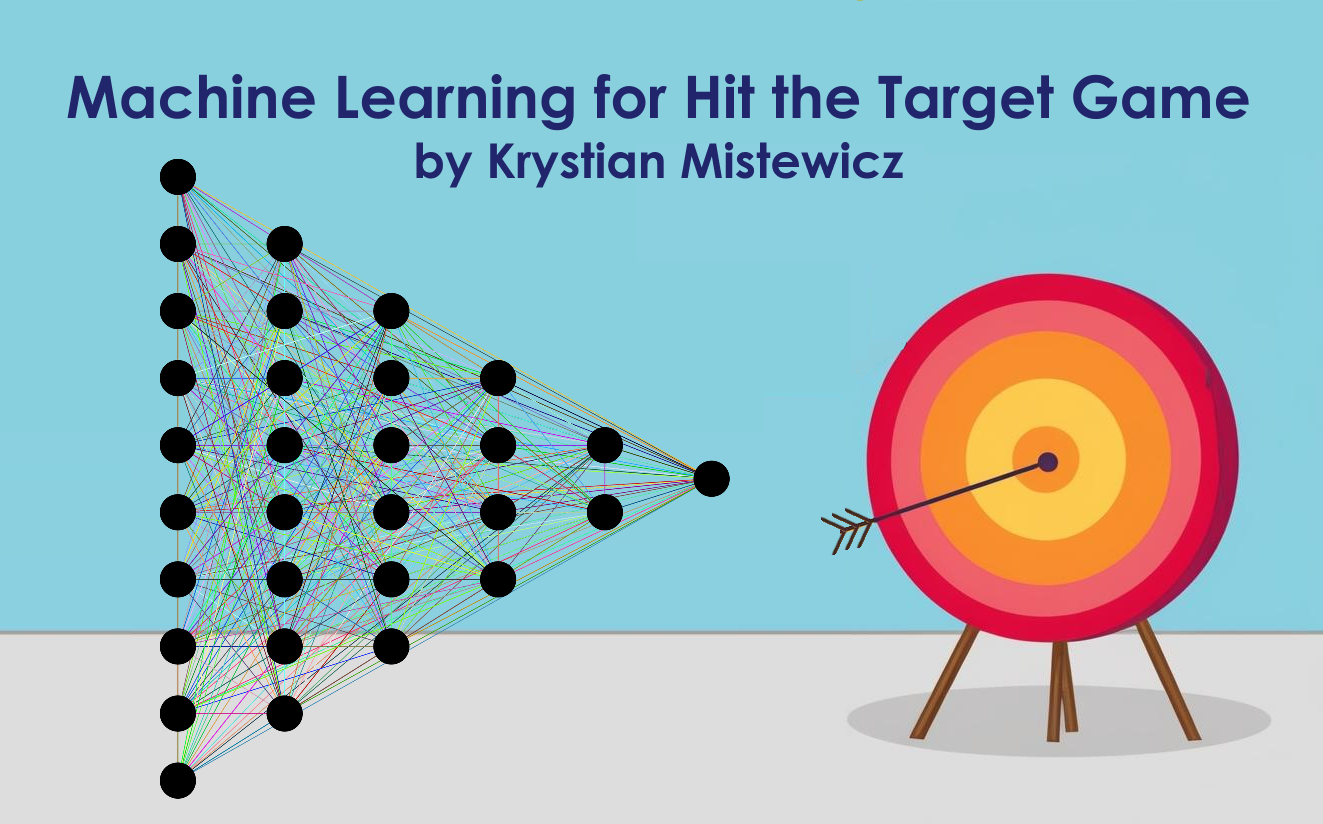

In [85]:
# An embedding and displaying graphical abstract file into the project
from IPython.display import Image, display
import os
img_path = os.path.join('images', 'graphical_abstract.png')
try:
    img = Image(filename=img_path)
    display(img)
except FileNotFoundError as err:
    print(f"File not found: {img_path}. Details: {err}")

Import of all needed modules and libraries.

In [86]:
from data_for_learning import HitTargetGame
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from projectile_motion import ProjectileMotion
from plot import Graph

A generation of data (DataFrame object) for machine learning.

In [87]:
htg = HitTargetGame(samples_number=100000,
                    target_distance_range=(0.1, 5.0),
                    center_height_range=(1.0, 2.5),
                    target_diameter_range=(0.1, 1.0),
                    initial_height_range=(1.0, 2.5),
                    velocity_range=(0.1, 20.0),
                    angle_range=(-90.0, 90.0))
data = htg.generate_data(save_to_csv=True, save_to_xlsx=True)

A split of data into features and target variables.

In [88]:
X = data.drop(columns=['target reached'])
y = data['target reached']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

The neural network created using TensorFlow.

In [89]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Model compilation and fitting.

Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9122 - loss: 0.2692 - val_accuracy: 0.9222 - val_loss: 0.1862
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9187 - loss: 0.1920 - val_accuracy: 0.9222 - val_loss: 0.1718
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9199 - loss: 0.1725 - val_accuracy: 0.9258 - val_loss: 0.1556
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9269 - loss: 0.1575 - val_accuracy: 0.9364 - val_loss: 0.1384
Epoch 5/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9376 - loss: 0.1411 - val_accuracy: 0.9489 - val_loss: 0.1218
Epoch 6/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9492 - loss: 0.1199 - val_accuracy: 0.9554 - val_loss: 0.1060
Epoch 7/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9518 - loss: 0.1139 - val_accuracy: 0.9527 - val_loss: 0.1126
Epoch 8/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9555 - loss: 0.1040 - 

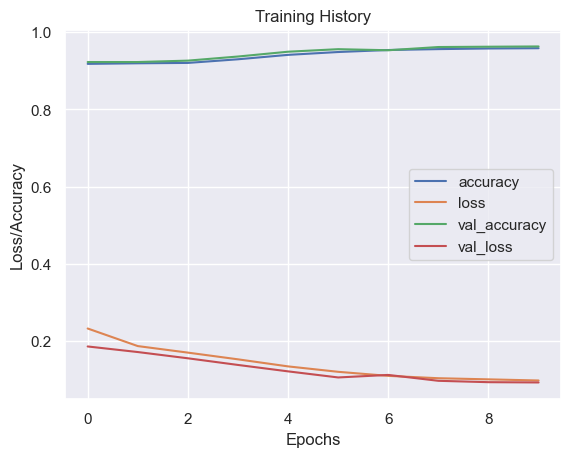

In [90]:
epochs_number = 10
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs_number, batch_size=32, validation_split=0.2)
# Graph of accuracy and loss determined during training
pd.DataFrame(history.history).plot(grid=True, xlabel='Epochs', ylabel='Loss/Accuracy')
plt.title('Training History')
plt.show()

Model evaluation using test data.

In [91]:
loss, accuracy = model.evaluate(X_test, y_test)
print('The results of model evaluation calculated for test data:')
print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 868us/step - accuracy: 0.9589 - loss: 0.0994
The results of model evaluation calculated for test data:
Loss: 0.0972
Accuracy: 0.9595


Additional model validation in graphical form:

We want to find correct values of initial height, velocity, and angle of projectile motion to hit the target. The diameter of target and its position is given. The exemplary values of these parameters can be taken from Dart game, where distance to target is 2.37 m, target has diameter of 0.451 m and the bull's eye (target center) height is equal to 1.73 m.

In [95]:
d = 2.37 # distance to target expressed in [m]
cp = 1.73 # height of target center expressed in [m]
td = 0.451 # diameter of target expressed in [m]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step


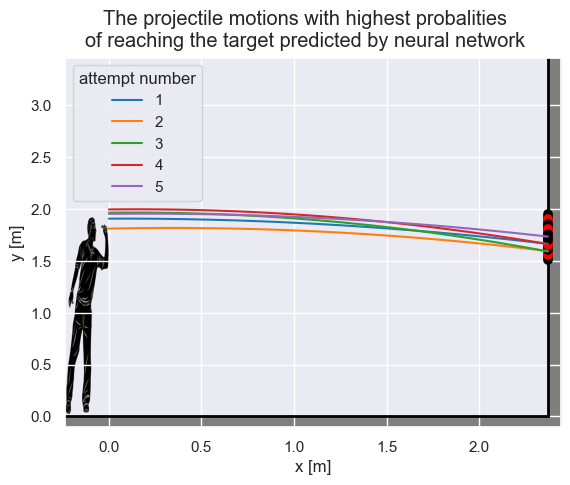

In [ ]:
# The ranges of parameters for prediction and searching the solution
solutions_number = 5 # number of different solutions to be found (for which the target is reached)
N = 10000 # number of samples for searching the solution
hr = (1.3, 2.0) # initial height range expressed in [m]
vr = (0.1, 20.0) # velocity range expressed in [m/s]
ar = (-90.0, 90.0) # angle range expressed in [degrees]
pred_htg = HitTargetGame(samples_number=N,
                        target_distance_range=(d, d),
                        center_height_range=(cp, cp),
                        target_diameter_range=(td, td),
                        initial_height_range=hr,
                        velocity_range=vr,
                        angle_range=ar)
data_for_pred = pred_htg.generate_data(save_to_csv=False, save_to_xlsx=False) # data for prediction
data_for_pred = data_for_pred.drop(columns=['target reached']) # remove the target reached column
predictions = model.predict(data_for_pred) # predict the target reached value
pred_data = data_for_pred.copy()
pred_data['predicted outcome'] = predictions # add the predicted outcome to the data
pred_data.sort_values(by='predicted outcome', ascending=False, inplace=True) # sort the data by predicted outcome
best_pred = pred_data.iloc[:solutions_number, :] # Selected the best solution with the highest predicted outcome
pm_list = [ProjectileMotion(d, row['initial height'], row['velocity'], row['angle']) for index, row in best_pred.iterrows()]
graph_title = 'The projectile motions with highest probabilities\nof reaching the target predicted by neural network'
graph = Graph(d, cp, td, pm_list, title=graph_title)
graph.make_plot()
